In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Load the tweets dataset
tweets = pd.read_csv(r'C:\Users\hp1\OneDrive - JK LAKSHMIPAT UNIVERSITY\Desktop\BIG DATA\translated_tweets.csv')

# Concatenate all the tweets into a single string
tweets_str = ' '.join([str(tweet) for tweet in tweets['Translated_Tweet'].tolist()])

# Tokenize the tweets string
tokens = word_tokenize(tweets_str)

# Compute the frequency distribution of the tokens
freq_dist = FreqDist(tokens)


In [3]:
tweets=tweets.drop(['Tweet'], axis=1)

In [3]:
word_freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values('Frequency', ascending=False).reset_index(drop=True)


In [42]:
word_freq_df.set_index('Word')

,Frequency
Word,
physicswallah,3802
wallah,785
sir,753
physics,738
alakh,677
...,...
gullaks3,1
panchayats2,1
breathintotheshadowss2,1


In [43]:
top=word_freq_df.head(20).set_index('Word')

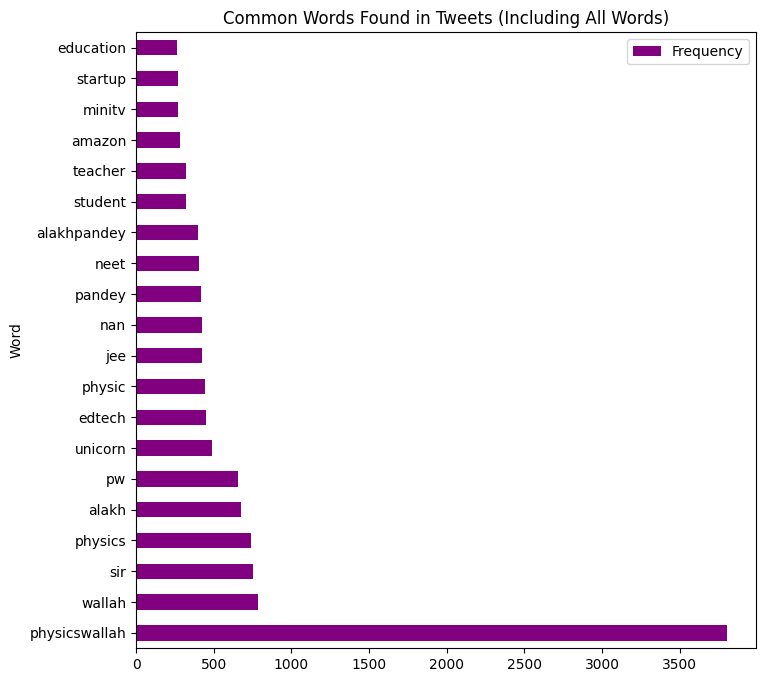

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
top.plot.barh(
                      y='Frequency',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [49]:
import pandas as pd

# load tweets from csv file
tweets = tweets.head(20)

# define positive, negative, and neutral words
positive_words = ['good', 'great', 'excellent', 'awesome', 'fantastic', 'nice', 'amazing', 'love', 'happy', 'enjoy']
negative_words = ['bad', 'terrible', 'horrible', 'awful', 'dislike', 'unhappy', 'hate', 'disappoint', 'annoy', 'disgust']
neutral_words = ['ok', 'fine', 'average', 'normal', 'typical', 'usual', 'standard', 'regular', 'common', 'routine']

# define function to calculate sentiment
def get_sentiment(tweet):
    positive_count = sum([1 for word in tweet.lower().split() if word in positive_words])
    negative_count = sum([1 for word in tweet.lower().split() if word in negative_words])
    neutral_count = sum([1 for word in tweet.lower().split() if word in neutral_words])
    
    if positive_count > negative_count and positive_count > neutral_count:
        return 'positive'
    elif negative_count > positive_count and negative_count > neutral_count:
        return 'negative'
    else:
        return 'neutral'
    
# add sentiment column to tweets dataframe
tweets['sentiment'] = tweets['Translated_Tweet'].apply(get_sentiment)

# display tweets with sentiment
print(tweets[['Translated_Tweet', 'sentiment']])


                                     Translated_Tweet sentiment
0   By closing one tap, the pin is leaking, when t...   neutral
1   sir please launch clat batch asap want prepare...   neutral
2   How much trouble will you have to face on the ...   neutral
3   techie dont agree failure ingredient success p...   neutral
4         server kara diye physicswallah pwserverdown   neutral
5   customer care service poor plus aap ui need wo...   neutral
6   neki kar dariya daal physics wallah etoosindia...   neutral
7   whats amazing edtech startup dont seem learn a...  positive
8   pocket might helpful physics student physics w...   neutral
9   techie agree put thought pwskills ineuron phys...   neutral
10  whats sibling relationship like monasingh vish...   neutral
11  escape speed minimum q angle projection physic...   neutral
12  coaching class like byjus physicswallah sell d...   neutral
13  parent arent willing put work required help ki...   neutral
14  coaching class like byjus physicswal

In [57]:
from textblob import TextBlob

# Create a new column 'sentiment' to store the sentiment of each tweet
tweets['sentiment'] = tweets['Translated_Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Classify the sentiment as positive, negative or neutral based on the 'sentiment' value
tweets.loc[tweets['sentiment'] > 0, 'sentiment_class'] = 'positive'
tweets.loc[tweets['sentiment'] == 0, 'sentiment_class'] = 'neutral'
tweets.loc[tweets['sentiment'] < 0, 'sentiment_class'] = 'negative'


TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [6]:
import pandas as pd
from textblob import TextBlob

# load the tweets csv into a pandas dataframe
#tweets = pd.read_csv('tweets.csv')

# convert the tweet column to string
tweets['Translated_Tweet'] = tweets['Translated_Tweet'].astype(str)

# define a function to get the sentiment of a tweet
def get_sentiment(tweet):
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# apply the get_sentiment function to the tweet column and create a new column for sentiment
tweets['sentiment'] = tweets['Translated_Tweet'].apply(get_sentiment)

# display the tweets dataframe with the sentiment column
print(tweets.head())


                        Date             User  \
0  2023-04-11 05:06:06+00:00        btkamu111   
1  2023-04-11 04:32:00+00:00  AdityaN59800330   
2  2023-04-11 01:28:15+00:00    Rkumar1993may   
3  2023-04-10 14:17:00+00:00       pw__skills   
4  2023-04-10 12:56:21+00:00    ____yogesh___   

                                    Translated_Tweet sentiment  
0  By closing one tap, the pin is leaking, when t...  positive  
1  sir please launch clat batch asap want prepare...  positive  
2  How much trouble will you have to face on the ...  negative  
3  techie dont agree failure ingredient success p...  positive  
4        server kara diye physicswallah pwserverdown   neutral  


In [7]:
tweets

,Date,User,Translated_Tweet,sentiment
0,2023-04-11 05:06:06+00:00,btkamu111,"By closing one tap, the pin is leaking, when t...",positive
1,2023-04-11 04:32:00+00:00,AdityaN59800330,sir please launch clat batch asap want prepare...,positive
2,2023-04-11 01:28:15+00:00,Rkumar1993may,How much trouble will you have to face on the ...,negative
3,2023-04-10 14:17:00+00:00,pw__skills,techie dont agree failure ingredient success p...,positive
4,2023-04-10 12:56:21+00:00,____yogesh___,server kara diye physicswallah pwserverdown,neutral
...,...,...,...,...
4771,2019-08-11 15:06:03+00:00,stay_mad__,anything unsubscribe physics wallah physics wa...,neutral
4772,2019-01-10 18:34:24+00:00,Invention_INDIA,top channel medical neet preparation mbbs biol...,positive
4773,2019-01-09 15:53:32+00:00,Invention_INDIA,top channel medical neet preparation mbbs biol...,positive
4774,2018-11-29 01:13:21+00:00,Sushils28455718,tribute teacher providing free education made ...,positive


In [8]:
sentiment_counts = tweets['sentiment'].value_counts()
print(sentiment_counts)


neutral     2640
positive    1744
negative     392
Name: sentiment, dtype: int64


In [9]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load pre-trained BERT model and tokenizer
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define a function to perform sentiment analysis
def bert_sentiment(text):
    input_ids = tokenizer.encode(text, return_tensors='pt')
    outputs = model(input_ids)
    _, predicted = torch.max(outputs[0], dim=1)
    sentiment = predicted.tolist()[0]
    return sentiment

# Apply the function on the 'Tweet' column of the tweets dataframe
tweets['Sentiment'] = tweets['Translated_Tweet'].apply(bert_sentiment)


In [11]:
from sklearn.model_selection import train_test_split
test,train= train_test_split(tweets,test_size = 0.2)

In [12]:
train

,Date,User,Translated_Tweet
2197,2022-11-11 12:19:37+00:00,yadavruchi7077,always keep smile your face physicswallah be p...
1537,2022-12-24 06:08:10+00:00,SaadKam93554152,hi guy trouble physicsrelated question topic f...
2975,2022-08-20 09:32:36+00:00,divyanshu8903,NaN
3247,2022-07-21 04:05:25+00:00,physics__wallah,jab mission hai jabardast toh tayari bhi honi ...
501,2023-03-24 17:10:35+00:00,modernpoet01,pure entertainment guy pw physicswallah
...,...,...,...
507,2023-03-24 13:24:01+00:00,reversesweep63,physicswallah full support alakh sir forever g...
1122,2023-02-11 05:31:24+00:00,sonalgoelias,nice experience upscwallahpw sharing journey c...
2100,2022-12-05 04:19:59+00:00,theepictalks003,podcast indian edtech history check link spoke...
4073,2022-06-07 16:18:56+00:00,Shahzer26970366,usually teacher used proud student today im pr...


In [13]:
import pandas as pd
from textblob import TextBlob

# load the tweets csv into a pandas dataframe
#tweets = pd.read_csv('tweets.csv')

# convert the tweet column to string
train['Translated_Tweet'] = train['Translated_Tweet'].astype(str)

# define a function to get the sentiment of a tweet
def get_sentiment(tweet):
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# apply the get_sentiment function to the tweet column and create a new column for sentiment
train['sentiment'] = train['Translated_Tweet'].apply(get_sentiment)

# display the tweets dataframe with the sentiment column
print(tweets.head())


                        Date             User  \
0  2023-04-11 05:06:06+00:00        btkamu111   
1  2023-04-11 04:32:00+00:00  AdityaN59800330   
2  2023-04-11 01:28:15+00:00    Rkumar1993may   
3  2023-04-10 14:17:00+00:00       pw__skills   
4  2023-04-10 12:56:21+00:00    ____yogesh___   

                                    Translated_Tweet  
0  By closing one tap, the pin is leaking, when t...  
1  sir please launch clat batch asap want prepare...  
2  How much trouble will you have to face on the ...  
3  techie dont agree failure ingredient success p...  
4        server kara diye physicswallah pwserverdown  


In [14]:
train

,Date,User,Translated_Tweet,sentiment
2197,2022-11-11 12:19:37+00:00,yadavruchi7077,always keep smile your face physicswallah be p...,positive
1537,2022-12-24 06:08:10+00:00,SaadKam93554152,hi guy trouble physicsrelated question topic f...,positive
2975,2022-08-20 09:32:36+00:00,divyanshu8903,nan,neutral
3247,2022-07-21 04:05:25+00:00,physics__wallah,jab mission hai jabardast toh tayari bhi honi ...,negative
501,2023-03-24 17:10:35+00:00,modernpoet01,pure entertainment guy pw physicswallah,positive
...,...,...,...,...
507,2023-03-24 13:24:01+00:00,reversesweep63,physicswallah full support alakh sir forever g...,positive
1122,2023-02-11 05:31:24+00:00,sonalgoelias,nice experience upscwallahpw sharing journey c...,positive
2100,2022-12-05 04:19:59+00:00,theepictalks003,podcast indian edtech history check link spoke...,neutral
4073,2022-06-07 16:18:56+00:00,Shahzer26970366,usually teacher used proud student today im pr...,positive


In [15]:
train

,Date,User,Translated_Tweet,sentiment
2197,2022-11-11 12:19:37+00:00,yadavruchi7077,always keep smile your face physicswallah be p...,positive
1537,2022-12-24 06:08:10+00:00,SaadKam93554152,hi guy trouble physicsrelated question topic f...,positive
2975,2022-08-20 09:32:36+00:00,divyanshu8903,nan,neutral
3247,2022-07-21 04:05:25+00:00,physics__wallah,jab mission hai jabardast toh tayari bhi honi ...,negative
501,2023-03-24 17:10:35+00:00,modernpoet01,pure entertainment guy pw physicswallah,positive
...,...,...,...,...
507,2023-03-24 13:24:01+00:00,reversesweep63,physicswallah full support alakh sir forever g...,positive
1122,2023-02-11 05:31:24+00:00,sonalgoelias,nice experience upscwallahpw sharing journey c...,positive
2100,2022-12-05 04:19:59+00:00,theepictalks003,podcast indian edtech history check link spoke...,neutral
4073,2022-06-07 16:18:56+00:00,Shahzer26970366,usually teacher used proud student today im pr...,positive


In [16]:
sentiment_counts = train['sentiment'].value_counts()
print(sentiment_counts)


neutral     518
positive    350
negative     88
Name: sentiment, dtype: int64


In [17]:
import pandas as pd
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
from transformers import BertTokenizer, BertModel


# Define the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define the training data
train_texts = train['Translated_Tweet'].tolist()
train_labels = train_df['sentiment'].tolist()

# Convert the text data to numerical features using BERT
train_features = []
for text in train_texts:
    encoded_text = tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    with torch.no_grad():
        output = model(input_ids, attention_mask=attention_mask)
    features = output[0].mean(dim=1).squeeze().tolist()
    train_features.append(features)

# Define the test data
test_texts = test_df['Translated_Tweet'].tolist()

# Convert the text data to numerical features using BERT
test_features = []
for text in test_texts:
    encoded_text = tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    with torch.no_grad():
        output = model(input_ids, attention_mask=attention_mask)
    features = output[0].mean(dim=1).squeeze().tolist()
    test_features.append(features)

# Train an SVM model on the training data
svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_features, train_labels)

# Use the trained model to predict stress levels for the test data
predicted_labels = svm_model.predict(test_features)

# Print the predicted stress levels for each test text
for i in range(len(test_texts)):
    print('Text: ' + test_texts[i] + '\tPredicted sentiment: ' + str(predicted_labels[i]))

c:\Users\hp1\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp1\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)

KeyboardInterrupt: 